In [1]:
from time import time
from turtle import width
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Data/PowerPlants/global_power_plant_database.csv')
df.estimated_generation_gwh_2013.fillna(0, inplace = True)
df.estimated_generation_gwh_2014.fillna(0, inplace = True)
df.estimated_generation_gwh_2015.fillna(0, inplace = True)
df.estimated_generation_gwh_2016.fillna(0, inplace = True)
df.estimated_generation_gwh_2017.fillna(0, inplace = True)

raw_values = df.to_numpy()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
time_table = dict()
for i in raw_values:
    for j in range(26, 31):
        if i[1] not in time_table.keys():
            if i[7] == 'Solar':
                x = [[i[j],0,0,0,0], [0,0,0,0,0]]
                time_table.update({i[1]: x})
            elif i[7] == 'Wind':
                x = [[0,0,0,0,0], [i[j],0,0,0,0]]
                time_table.update({i[1]: x})
            else:
                x = [[0,0,0,0,0], [0,0,0,0,0]]
                time_table.update({i[1]: x})
        else:
            if i[7] == 'Solar':
                x = time_table.get(i[1])
                x[0][j-26] += i[j]
                x[0][j-26] = round(x[0][j-26], 2)
                time_table.update({i[1]: x})
            if i[7] == 'Wind':
                x = time_table.get(i[1])
                x[1][j-26] += i[j]
                x[1][j-26] = round(x[1][j-26], 2)
                time_table.update({i[1]: x})

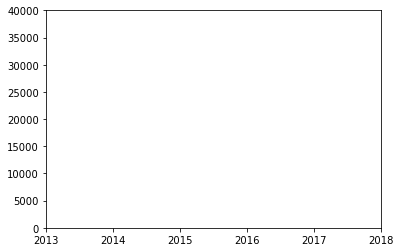

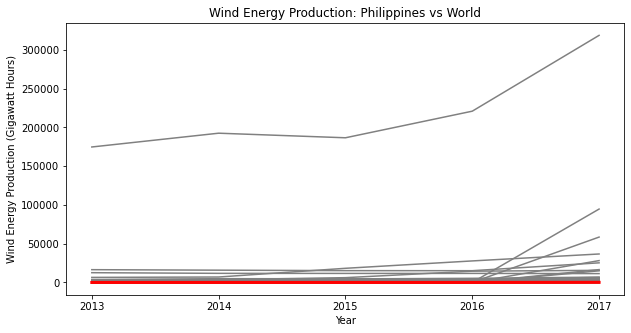

In [5]:
x = range(2013,2018)
plt.axis([2013, 2018, 0, 40000])
plt.figure(figsize = (10,5))
plt.title('Wind Energy Production: Philippines vs World')
plt.ylabel('Wind Energy Production (Gigawatt Hours)')
plt.xlabel('Year')
plt.xticks(x)
for i in time_table:
    mycolor = "gray"
    if i == "Philippines":
        mycolor = "red"
        
    plt.plot(x, time_table.get(i)[1], color = mycolor)
plt.plot(x, time_table.get('Philippines')[1], "red", linewidth = 3.0, label = 'Philippines')
#plt.text(2017.01, time_table.get('Philippines')[0][4], 'Philippines')
plt.show()

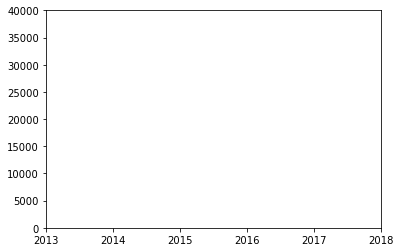

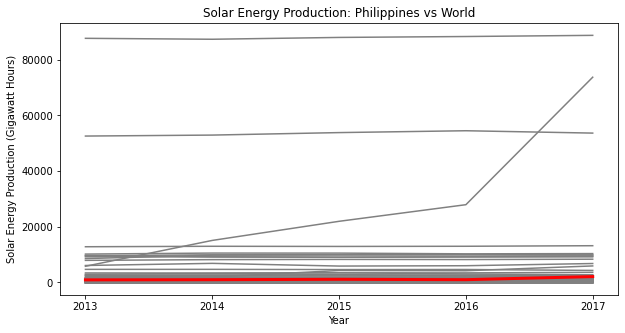

In [8]:
plt.axis([2013, 2018, 0, 40000])
plt.figure(figsize = (10,5))
plt.title('Solar Energy Production: Philippines vs World')
plt.ylabel('Solar Energy Production (Gigawatt Hours)')
plt.xlabel('Year')
plt.xticks(x)
for i in time_table:
    mycolor = "gray"
    if i == "Philippines":
        mycolor = "red"
        
    plt.plot(x, time_table.get(i)[0], color = mycolor)
plt.plot(x, time_table.get('Philippines')[0], "red", linewidth = 3.0, label = 'Philippines')
#plt.text(2017.01, time_table.get('Philippines')[0][4], 'Philippines')
plt.show()